In [180]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [181]:
#Reading data from CSV file
Dataset = pd.read_csv('Fish.csv')
print(Dataset)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [273]:
# Select model from the Scikitlearn and then divided the data into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split


In [481]:
# Create variable input_features and Output for the Simple linear regression
features = ['Length1']
print(features)
output = ['Weight']
print(output)

['Length1']
['Weight']


In [482]:
#Taking Lenght1 as an input features and Weight as ouput feature.
x = Dataset[['Length1']]
print(x)
y = Dataset[['Weight']]
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

     Length1
0       23.2
1       24.0
2       23.9
3       26.3
4       26.5
..       ...
154     11.5
155     11.7
156     12.1
157     13.2
158     13.8

[159 rows x 1 columns]
     Weight
0     242.0
1     290.0
2     340.0
3     363.0
4     430.0
..      ...
154    12.2
155    13.4
156    12.2
157    19.7
158    19.9

[159 rows x 1 columns]


###### Question1. Implement the gradient descent algorithm (regression_gradient_descent) from scratch to compute coefficients for multiple regression. [Make sure you add a ‘constant’ column in the feature matrix. Implement functions for output prediction, feature derivative and RSS calculations.]

In [483]:
#Adding constant column into Feature list.
Dataset['constant'] = 1
print(Dataset)
print(len(Dataset))

    Species  Weight  Length1  Length2  Length3   Height   Width  constant
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200         1
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056         1
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961         1
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555         1
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340         1
..      ...     ...      ...      ...      ...      ...     ...       ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936         1
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690         1
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558         1
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672         1
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792         1

[159 rows x 8 columns]
159


In [484]:
#Feature_matrix with one extra column name constant
feature_matrix = ['constant'] + features
print(feature_matrix)
print(len(feature_matrix))
output = ['Weight']
print(output)

['constant', 'Length1']
2
['Weight']


In [573]:
#Feature_matrix with the constant column name using numpy
def getdata_numpy(Dataset, features, output):

    features_matrix = np.array([np.ones(len(Dataset))] + [Dataset[feature] for feature in features])

    output_array = np.array(Dataset[output])
    
    return features_matrix, output_array

In [520]:
#Below code just the output for our data
(ex_features, ex_output) = getdata_numpy(Dataset, ['Length1'], 'Weight') 
print(example_features[0,:]) 
print(example_output[0]) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
242.0


In [521]:
#Below function predict the output values for the feature matrix and and weights.
def output_prediction(feature_matrix, weights):
    return feature_matrix.T.dot(weights)


In [522]:
#Below function predict the prediction ‘errors’ (predictions - output) then the derivative of 
#the regression cost function with respect to the weight of ‘feature’ is just twice the dot product between 
#‘feature’ and ‘errors’. IT gives the derivtion of errors and features.
def feature_derivation(errors, feature):
    return 2 * feature.dot(errors)

In [523]:
#importing math library
from math import sqrt 

In [524]:
# Below Function Accepts a numpy feature_matrix 2D array, a 1D output array, an array of initial weights,step size and a tolerance.
# At each step computes the magnitude/length of the gradient (square root of the sum of squared components)
# input tolerance returns the final weight vector When the magnitude of the gradient is smaller than the 
# Below code return the weights for gradient decent. 
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    
    while not converged:
        
        predictions = output_prediction(feature_matrix, weights) # Calculate predictions based on feature_matrix and weights:
        
        errors = predictions - output # calculate the error:
        
        gradient_sum_squares = 0 
        
        for i in range(len(weights)):
            
            derivative = feature_derivation(errors, feature_matrix.T[:,i]) # calculate the derivative for weight[i]:

            gradient_sum_squares = derivative ** 2 #Gradient Magnitude
            
            weights[i] = weights[i] - step_size * derivative # update the weight based on step size and derivative
            
        gradient_magnitude = np.sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

###### Question2. Use the regression_gradient_descent function implemented in Q1 to compute the model coefficients and test error (RSS) for each of the following cases. Calculate training and test RSS for each step of the gradient descent and then plot it for each of the cases given below.

In [559]:
features = ['Length1']
output= 'Weight'
S_feature_matrix, output = getdata_numpy(Train_data, features, output)
initial_weights = np.array([-7.5, 1.])
step_size = 7e-10
tolerance = 1.4e4


In [560]:
#calculate the model coefficent for length1.
Model_coefficient_Length1 = regression_gradient_descent(S_feature_matrix, output,initial_weights, step_size,tolerance)
print(Model_coefficient_Length1)

[-7.30922984 17.19865988]


In [561]:
#predicted output values for test data first case
test_simple_feature_matrix, train_output = getdata_numpy(Test_data, features, my_output)
test_predictions = output_prediction(test_simple_feature_matrix, Model_coefficient_Length1)
print(test_predictions)

[336.66396773 677.19743332 345.26329766 336.66396773 594.6438659
 539.60815429 190.47535876 955.81572335 176.71643086 682.35703128
 336.66396773 281.62825611 551.64721621 319.46530785 371.06128748
 336.66396773 515.53003046 532.72869034 577.44520602 955.81572335
 312.5858439  324.62490581 319.46530785 305.70637994 453.6148549
 453.6148549  224.87267852 405.45860724 319.46530785 353.8626276
 273.02892618 486.29230867]


In [562]:
#Calculated RSS value for test data first case
test_rss = np.sum((test_predictions - test_output) ** 2)
print(test_rss)


1986971.9239113512


In [613]:
#predicted output for train data first case
train_simple_feature_matrix, train_output = getdata_numpy(Train_data, features, my_output)
train_predictions = output_prediction(train_simple_feature_matrix, Model_coefficient_Length1)
print(train_predictions)

[ 541.32802028  405.45860724  171.55683289  603.24319584  188.75549277
  515.53003046  305.70637994  219.71308055  635.92064961  293.66731803
  498.33137058  429.53673107  238.63160642  498.33137058  321.18517384
  121.68071925  372.78115347  543.04788627  467.3737828   525.84922639
  493.17177262  481.1327107   353.8626276   276.46865815  187.03562678
  594.6438659   271.30906019  345.26329766  467.3737828   823.38604229
  699.55569116  405.45860724  178.43629684  371.06128748  429.53673107
 1007.41170299  591.20413393  422.65726712  482.85257669  348.70302964
  187.03562678  630.76105165  537.8882883   735.67287691  164.67736894
  381.38048341  432.97646305  438.13606101  298.82691599  362.46195754
  629.04118566  391.69967934  426.09699909  586.04453596  646.23984554
  577.44520602  524.1293604   345.26329766  615.28225776  343.54343168
  398.57914329  357.30235958  568.84587608  531.00882435  763.19073271
  398.57914329  500.05123657  388.25994736  319.46530785  572.28560806
  482.

In [614]:
#Calculated RSS value for the train data
train_rss = np.sum((train_predictions - train_output) ** 2)
print(train_rss)


5454820.09853312


In [615]:
model_features = ['Length1', 'Width']
my_output = 'Weight'
(feature_matrix, output) = getdata_numpy(Train_data, model_features, my_output)
initial_weights = np.array([-8.5, 1., 1.])
step_size = 4e-10
tolerance = 1.4e4

my_weights = regression_gradient_descent(feature_matrix, output,initial_weights, step_size, tolerance)
my_weights

array([-8.32453822, 16.59406427,  3.92527246])

In [616]:
test_feature_matrix, test_output = get_numpy_data(Test_data, model_features, my_output)
test_predictions2 = predict_outcome(test_feature_matrix, my_weights)
test_predictions2

array([337.3933326 , 680.68421247, 346.84949769, 339.23821066,
       597.16552555, 543.43098091, 187.97746058, 945.05993488,
       174.24530745, 677.23251661, 337.3933326 , 282.71593752,
       561.58279708, 320.11862609, 371.75904288, 336.93211309,
       516.88165065, 533.80936308, 582.81671713, 945.05993488,
       314.35476603, 325.81281506, 319.8941005 , 306.14860144,
       455.73777174, 457.1159349 , 224.8274758 , 406.83365736,
       319.94552157, 354.38384939, 272.65096266, 486.82372311])

In [617]:
test2ss = np.sum((test_predictions2 - test_output) ** 2)
test2_rss, test_rss

(2003456.176977193, 1986971.9239113512)

In [611]:
train_feature_matrix, test_output = get_numpy_data(Train_data, model_features, my_output)
train_predictions2 = predict_outcome(train_feature_matrix, my_weights)
train_predictions2

array([ 542.96445977,  406.55260785,  169.67060618,  598.72875277,
        185.35557735,  516.5366192 ,  304.56828675,  218.83143337,
        638.77845635,  293.52592407,  501.44397165,  430.18075035,
        238.05444637,  499.83775015,  321.95113703,  121.65772743,
        374.60466664,  546.5904277 ,  468.68487037,  528.57384469,
        491.70832214,  482.98226274,  353.20234238,  276.55346353,
        184.22765281,  597.22165695,  273.53748796,  346.07896671,
        468.08116347,  817.39240742,  703.50708783,  407.58416946,
        175.93611606,  371.79908066,  431.08827334, 1000.0862917 ,
        584.9277086 ,  422.7933976 ,  484.07328971,  349.4213312 ,
        183.76486319,  633.33980261,  534.02858202,  727.65511511,
        162.16942053,  383.0532143 ,  434.86006264,  437.96435685,
        298.97007319,  363.0694835 ,  634.94779298,  392.43734813,
        430.0111836 ,  588.76094095,  647.25585225,  582.33312356,
        524.58361148,  346.07896671,  618.87499988,  344.93141

In [618]:
train2_rss = np.sum((train_predictions2 - train_output) ** 2)
train2_rss, train_rss

(5392552.831522416, 5454820.09853312)

In [625]:

#case3
model_features = ['Length1', 'Width','Height']
my_output = 'Weight'
(feature_matrix, output) = get_numpy_data(Train_data, model_features, my_output)
initial_weights = np.array([-10, 1., 1.,1.])
step_size = 4e-10
tolerance = 1.4e4

my_weights1 = regression_gradient_descent(feature_matrix, output,initial_weights, step_size, tolerance)
my_weights1

array([-13.05796564,  12.94243719,   5.16870649,  11.03515654])

In [626]:
test_feature_matrix, test_output = get_numpy_data(Test_data, model_features, my_output)
test_predictions3 = predict_outcome(test_feature_matrix, my_weights1)
print(test_predictions3)

[331.4352749  671.34506115 349.62267606 327.38141248 672.00860791
 600.89723128 166.05106259 849.4125522  155.01602228 618.36689112
 326.24875132 277.8929028  574.64122044 321.62662317 361.7950777
 330.82795188 571.69764629 597.58446291 582.53643831 849.4125522
 314.73988979 325.44572012 344.08988    300.88302697 509.37224857
 517.55537026 249.2531664  457.53366306 315.24437642 335.06190939
 293.43725412 541.86588451]


In [638]:
test3_rss = np.sum((test_predictions3 - test_output) ** 2)
print(test3_rss, test2_rss,test_rss)

2156293.070428636 2003456.176977193 1986971.9239113512


In [624]:
train_feature_matrix, train_output = get_numpy_data(Train_data, model_features, my_output)
train_predictions3 = predict_outcome(train_feature_matrix, my_weights1)
train_predictions3

array([607.9101409 , 444.89248961, 152.90939981, 550.49943087,
       164.74745988, 572.09964514, 292.90271105, 200.16875297,
       711.50855453, 321.12672821, 566.65181645, 417.17745545,
       256.56073825, 559.20018005, 319.75549621, 114.5941026 ,
       375.92702747, 613.13247105, 523.73574497, 577.4825191 ,
       537.97879224, 538.28159276, 348.19943966, 273.54435691,
       164.25789301, 671.56276454, 271.40789375, 345.94417219,
       508.20996745, 742.46088621, 695.95252642, 418.76004371,
       155.19292421, 374.64195899, 419.64812448, 908.51986535,
       527.50949315, 411.02208576, 538.42793511, 339.30738256,
       163.64850252, 624.25144602, 481.69524122, 657.21286113,
       144.12343444, 375.27703528, 439.3328467 , 430.18077148,
       289.70796436, 353.7034728 , 641.0072316 , 435.10978046,
       431.49025515, 585.40191703, 706.15997334, 578.8991946 ,
       585.91105092, 335.61526567, 697.3010114 , 334.42671072,
       390.77425981, 394.42529829, 663.8361115 , 587.77

In [637]:
train3_rss = np.sum((train_predictions3 - train_output) ** 2)
print(train3_rss, train2_rss, train_rss)

4971406.468135323 5392552.831522416 5454820.09853312


In [656]:
TestDataG = [test_rss, test2_rss,test3_rss]
print(TestDataG)
TEST = ['Test1', 'Test2', 'Test3']

[1986971.9239113512, 2003456.176977193, 2156293.070428636]


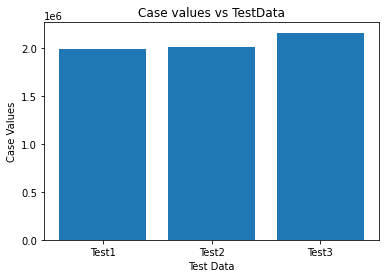

In [657]:
plt.figure()
plt.bar(TEST,TestDataG)
plt.title("Case values vs TestData")
plt.xlabel("Test Data")
plt.ylabel("Case Values")
plt.show()


In [659]:
TrainDataG = [train_rss, train2_rss,train3_rss]
print(TestDataG)
Train = ['Train1', 'Train2', 'Train3']

[1986971.9239113512, 2003456.176977193, 2156293.070428636]


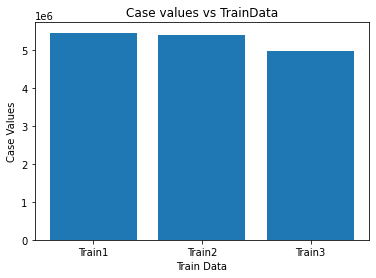

In [661]:
plt.figure()
plt.bar(Train,TrainDataG)
plt.title("Case values vs TrainData")
plt.xlabel("Train Data")
plt.ylabel("Case Values")
plt.show()

###### 3. Use in-built linear regression functions of Scikit Learn library to compute higher polynomial regression models for degrees 2, 3, 4, 5 and 6. Use ‘Lenght1’ as the input feature and ‘Weight’ as output. For each of the model, compute the RSS (on the train and test dataset), and plot the model through the training data. 

In [510]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [629]:
Test_RSS={}
Train_RSS={}

def perform_polynomial_structure(features, poly_degree):
    polynomial_features = PolynomialFeatures(poly_degree)
    features_poly = polynomial_features.fit_transform(features.reshape(-1,1))
    return features_poly
    

In [630]:
def calculate_rss_value(output_train_poly_prediction, output_test_poly_prediction, output_train, output_test, poly_degree):
    Train_RSS[poly_degree] = np.sum((output_train-output_train_poly_prediction)**2)
    Test_RSS[poly_degree] = np.sum((output_test-output_test_poly_prediction)**2)
    
    

In [632]:
def predict_output_values(train_features, test_features, model, poly_degree, output_train, output_test):
    train_features_poly = perform_polynomial_structure(train_features, poly_degree)
    test_features_poly = perform_polynomial_structure(test_features, poly_degree)
    output_train_poly_prediction = model.predict(train_features_poly)
    output_test_poly_prediction = model.predict(test_features_poly)
    calculate_rss_value(output_train_poly_prediction, output_test_poly_prediction, output_train, output_test, poly_degree)
    


In [633]:
def perform_polynomial_regression(train_features,test_features, output_train, output_test, poly_degree):
    features_poly = perform_polynomial_structure(train_features, poly_degree)
    model = LinearRegression()
    model.fit(features_poly, output_train)
    predict_output_values(train_features, test_features, model, poly_degree, output_train,output_test)
    


In [634]:
polys_degree = [2,3,4,5,6]
for i in polys_degree:
    perform_polynomial_regression(np.array(x_train['Length1'].values.tolist()),
                                  np.array(x_test['Length1'].values.tolist()),
                                  np.array(y_train['Weight'].values.tolist()),
                                  np.array(y_test['Weight'].values.tolist()),i )
print('Test RSS Values:' ,Test_RSS )
print('Train RSS Values:', Train_RSS)

Test RSS Values: {2: 501842.6164169266, 3: 478360.54172428884, 4: 466296.3603803235, 5: 483525.79786606657, 6: 513625.86408585403}
Train RSS Values: {2: 2594721.0120108463, 3: 2512449.547397242, 4: 2195668.242920056, 5: 2115348.7110960935, 6: 1949574.419389849}


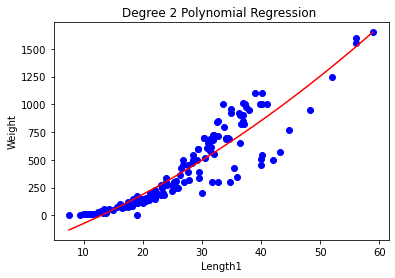

In [597]:
L1Input = Dataset.iloc[:, 2:3].values
WInput = Dataset.iloc[:, 1].values


#Fitting Polynomial Regression to the dataset
#poly_degree = [2,3,4,5, 6]
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree = 2)

L1Input_poly = poly_regression.fit_transform(L1Input)

linear_regression = LinearRegression()
linear_regression.fit(L1Input_poly, WInput)

# Visualising the Polynomial Regression results
L1Input_Grid = np.arange(min(L1Input), max(L1Input), 0.1)
L1Input_Grid = L1Input_Grid.reshape((len(L1Input_Grid), 1))
plt.scatter(L1Input,WInput, color = 'blue')
plt.plot(L1Input_Grid, linear_regression.predict(poly_regression.fit_transform(L1Input_Grid)), color = 'red')
plt.title('Degree 2 Polynomial Regression ')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()



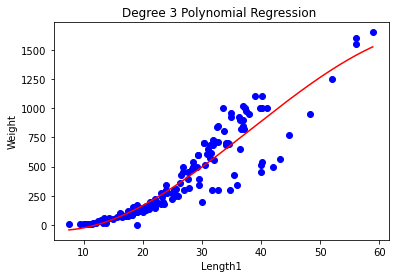

In [598]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree = 3)

L1Input_poly = poly_regression.fit_transform(L1Input)

linear_regression = LinearRegression()
linear_regression.fit(L1Input_poly, WInput)

# Visualising the Polynomial Regression results
L1Input_Grid = np.arange(min(L1Input), max(L1Input), 0.1)
L1Input_Grid = L1Input_Grid.reshape((len(L1Input_Grid), 1))
plt.scatter(L1Input,WInput, color = 'blue')
plt.plot(L1Input_Grid, linear_regression.predict(poly_regression.fit_transform(L1Input_Grid)), color = 'red')
plt.title('Degree 3 Polynomial Regression ')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()


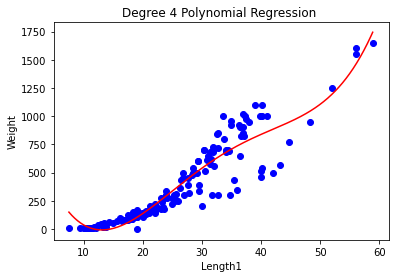

In [599]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree = 4)

L1Input_poly = poly_regression.fit_transform(L1Input)

linear_regression = LinearRegression()
linear_regression.fit(L1Input_poly, WInput)

# Visualising the Polynomial Regression results
L1Input_Grid = np.arange(min(L1Input), max(L1Input), 0.1)
L1Input_Grid = L1Input_Grid.reshape((len(L1Input_Grid), 1))
plt.scatter(L1Input,WInput, color = 'blue')
plt.plot(L1Input_Grid, linear_regression.predict(poly_regression.fit_transform(L1Input_Grid)), color = 'red')
plt.title('Degree 4 Polynomial Regression ')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()


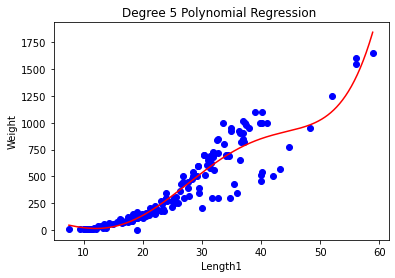

In [600]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree = 5)

L1Input_poly = poly_regression.fit_transform(L1Input)

linear_regression = LinearRegression()
linear_regression.fit(L1Input_poly, WInput)

# Visualising the Polynomial Regression results
L1Input_Grid = np.arange(min(L1Input), max(L1Input), 0.1)
L1Input_Grid = L1Input_Grid.reshape((len(L1Input_Grid), 1))
plt.scatter(L1Input,WInput, color = 'blue')
plt.plot(L1Input_Grid, linear_regression.predict(poly_regression.fit_transform(L1Input_Grid)), color = 'red')
plt.title('Degree 5 Polynomial Regression ')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()


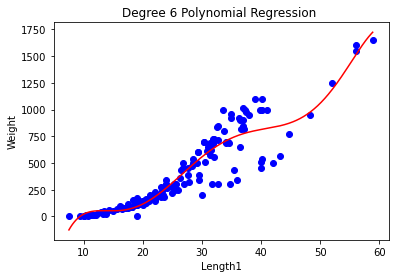

In [601]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree = 6)

L1Input_poly = poly_regression.fit_transform(L1Input)

linear_regression = LinearRegression()
linear_regression.fit(L1Input_poly, WInput)

# Visualising the Polynomial Regression results
L1Input_Grid = np.arange(min(L1Input), max(L1Input), 0.1)
L1Input_Grid = L1Input_Grid.reshape((len(L1Input_Grid), 1))
plt.scatter(L1Input,WInput, color = 'blue')
plt.plot(L1Input_Grid, linear_regression.predict(poly_regression.fit_transform(L1Input_Grid)), color = 'red')
plt.title('Degree 6 Polynomial Regression ')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()


###### 4.	From all the models in Q2 and Q3, which model is the best and why? What criteria you will use? 

When we are working with regression our main aim is to draw a best fit line our the data point. As per my research and implementation, when we got the minimum train error and test data that will be the best model. Moreover, in best model there is low bias and low variance. In polynomial regression, model is dependended on the number of degrees. Higher the number of degree model can give more accurate result. 

As per my opinion, degree 6 graph is best because there is low train and test error. Bias is depended on the training dataset and variance is depended on test dataset. In polynomial regression, initially we are using less training data to build our model and that means there is high bias and low variance and model is underfitting. Then we increasing our polynomial degree value that means model used more data in training in compression of testing. So initially, training error is high and testing error. There is comes a point where in the model less training error and training error and where model try to fit the best fit line. After that train error is decreasing and test error is increasing and it creates overfitting problem. To stop overfitting, we are using more data points to build our model. 

In gradient decent algotihm there is more error in comparison of polynomial regression. So,Here degree 6 model is giving more accurate result in comparison of other model. 

## References

[1] desicochrane/ml-regression-uni-washington. (2020). Retrieved 29 October 2020, from https://github.com/desicochrane/ml-regression-uni-washington/blob/master/Week_2/Week2_Assignment2.ipynb

[2] Polynomial Regression, Retrived From https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
